### requests.csv

Overview of each column in the `requests.csv` dataset -> What it should be.

| Column | Data Type | Description |
| --- | --- | --- |
| `AuthorId` | String | The unique identifier of a user. |
| `RecipeId` | String | The unique identifier of a recipe. |
| `Time` | Integer/double | The maximum duration a recipe should take, including preparation and cooking time. |
| `HighCalories` | Boolean | A flag indicating whether the resulting meal/beverage should have a high number of calories. |
| `LowFat` | Boolean | A flag indicating whether the resulting meal/beverage should include a low amount of fat. |
| `HighProtein` | Boolean | A flag indicating whether the resulting meal/beverage should have a high amount of proteins. |
| `LowSugar` | Boolean | A flag indicating whether the resulting meal/beverage should have low sugar. |
| `HighFiber` | Boolean | A flag indicating whether the resulting meal/beverage should have high fiber. |

In [30]:
import pandas as pd

# read csv file
df = pd.read_csv('requests.csv')

# print first 10 rows
print(df.head(8))

      AuthorId  RecipeId          Time  HighCalories  HighProtein  LowFat   
0  2001012259B     73440   1799.950949           0.0  Indifferent       0  \
1      437641B    365718   4201.820980           0.0          Yes       0   
2  1803340263D    141757   6299.861496           0.0  Indifferent       1   
3      854048B    280351  19801.365796           0.0          Yes       1   
4     2277685E    180505   5400.093457           0.0  Indifferent       0   
5  2002463647E    350271   1500.690672           0.0  Indifferent       0   
6      181611B     21518   3901.461811           1.0  Indifferent       0   
7       63028B    137143   2699.849907           0.0  Indifferent       0   

      LowSugar  HighFiber  
0            0          0  
1  Indifferent          1  
2  Indifferent          0  
3            0          1  
4            0          0  
5            0          0  
6  Indifferent          1  
7  Indifferent          0  


Checking for Null Values in a Dataset

In [46]:
# total number of rows and columns
print("Total number of rows and columns: ")
print(df.shape)

# check for NA values
print("NA values: ")
print(df.isna().any())

# check for null values
print("Null values: ")
print(df.isnull().sum())

# check for duplicates
print("Duplicate values: ")
print(df.duplicated().sum())

print(df.info())

Total number of rows and columns: 
(140195, 9)
NA values: 
AuthorId               False
RecipeId               False
Time                   False
HighCalories           False
HighProtein            False
LowFat                 False
LowSugar               False
HighFiber              False
HighProteinAndFiber    False
dtype: bool
Null values: 
AuthorId               0
RecipeId               0
Time                   0
HighCalories           0
HighProtein            0
LowFat                 0
LowSugar               0
HighFiber              0
HighProteinAndFiber    0
dtype: int64
Duplicate values: 
0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140195 entries, 0 to 140194
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   AuthorId             140195 non-null  int64  
 1   RecipeId             140195 non-null  int64  
 2   Time                 140195 non-null  float64
 3   HighCalories         1401

1. **Data Cleaning**
    - Check for any missing or inconsistent data.
    - Ensure that all flags are either 0 or 1 and not any other numeric value.
    - Decide whether to impute missing values or drop the records.

2. **Type Conversion**
    - Ensure that all data types are correct according to the description.
    - Convert flags like `HighCalories`, `LowFat`, `HighProtein`, `LowSugar`, and `HighFiber` to numeric if they are not.

In [32]:
# HighCalories is a 1.0 and 0.0, change to: true for it should have high calories and false for low calories.

df['HighCalories'] = df['HighCalories'].astype(bool)

# HighProtein is Indifferent and Yes, change to: true for it should have high protein and false for low protein.

df['HighProtein'] = df['HighProtein'].replace({'Indifferent': False, 'Yes': True})

# LowFat is a 1 and 0, change to: true for it should have low fat and false for high fat.

df['LowFat'] = df['LowFat'].astype(bool)

# LowSugar is Indifferent and 0, change to: true for it should have low sugar and false for high sugar.

df['LowSugar'] = df['LowSugar'].replace({'Indifferent': False, '0': True})

# HighFiber is 1 and 0, change to: true for it should have high fiber and false for low fiber.

df['HighFiber'] = df['HighFiber'].astype(bool)

print(df.head(8))

      AuthorId  RecipeId          Time  HighCalories  HighProtein  LowFat   
0  2001012259B     73440   1799.950949         False        False   False  \
1      437641B    365718   4201.820980         False         True   False   
2  1803340263D    141757   6299.861496         False        False    True   
3      854048B    280351  19801.365796         False         True    True   
4     2277685E    180505   5400.093457         False        False   False   
5  2002463647E    350271   1500.690672         False        False   False   
6      181611B     21518   3901.461811          True        False   False   
7       63028B    137143   2699.849907         False        False   False   

   LowSugar  HighFiber  
0      True      False  
1     False       True  
2     False      False  
3      True       True  
4      True      False  
5      True      False  
6     False       True  
7     False      False  



3. **Outlier Detection**
    - For the `Time` column, check for any outliers, such as extremely high values.
    - Decide whether to cap, transform, or remove these outliers.

In [33]:
import numpy as np

def detect_outliers_iqr(data, column, threshold=1.5):
    """
    Parameters:
    - data (DataFrame): The input DataFrame.
    - column (str): The name of the column to detect outliers in.
    - threshold (int): The number of interquartile ranges above the third quartile

    Returns:
    - outliers (DataFrame): A DataFrame containing the outliers found in the specified column.

    The quartiles could be modified to set a different threshold for outliers detection.
    For example, to detect outliers that are 3 times the interquartile range below the first quartile
    """
    # Calculate Q1, Q3 and IQR
    q1 = np.percentile(data[column], 25)
    q3 = np.percentile(data[column], 75)
    iqr = q3 - q1
    lower_bound = q1 - threshold * iqr
    upper_bound = q3 + threshold * iqr
    # outlier is below the lower bound or above the upper bound
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Detect outliers for the 'Time' column
outliers_time = detect_outliers_iqr(df, 'Time')
print("Outliers in 'Time' column:")
print(outliers_time)

# how many outliers are there?
print("Number of outliers in 'Time' column:")
print(len(outliers_time))
# how much compared to the total number of rows?
print("Percentage of outliers in 'Time' column:")
print(len(outliers_time) / len(df) * 100)

# Detect outliers for other columns
# Replace 'column_name' with the actual column names
# outliers_column = detect_outliers_iqr(df, 'column_name')
# print("Outliers in 'column_name' column:")
# print(outliers_column) 

Outliers in 'Time' column:
           AuthorId  RecipeId           Time  HighCalories  HighProtein   
3           854048B    280351   19801.365796         False         True  \
19         1234111D    461793   92700.327874         False        False   
32          149748B     28148   14699.160888         False         True   
39          891885A    381726  605101.127650         False        False   
57          394643C     36267   11101.909182         False         True   
...             ...       ...            ...           ...          ...   
140142      691726B     24048   22200.102519          True        False   
140168       53808E     38578    9300.985037         False         True   
140173  2000518445A     70646   22499.672059         False         True   
140178     1399607A     45809   14399.381563          True        False   
140181     1677720D    253577   71998.977353         False        False   

        LowFat  LowSugar  HighFiber  
3         True      True       Tru

4. **Feature Engineering**
    - Create new features that might be relevant to the prediction.
    - For example, create a feature that indicates whether a meal is high in both protein and fiber.

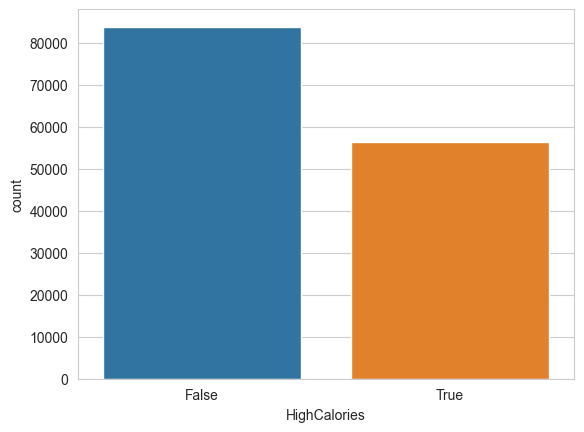

   AuthorId  RecipeId      Time  HighCalories  HighProtein  LowFat  LowSugar   
0     18621     19482  0.000104         False        False   False      True  \
1     39673     65072  0.000243         False         True   False     False   
2     12422     34512  0.000365         False        False    True     False   
3     47179     55433  0.001146         False         True    True      True   
4     31110     41089  0.000313         False        False   False      True   
5     27146     63565  0.000087         False        False   False      True   
6     13080      5445  0.000226          True        False   False     False   
7     43562     33611  0.000156         False        False   False     False   

   HighFiber  HighProteinAndFiber  HighProteinAndLowFat   
0      False                False                 False  \
1       True                 True                 False   
2      False                False                 False   
3       True                 True          

In [52]:
df['HighProteinAndFiber'] = (df['HighProtein'] & df['HighFiber']).astype(bool)
# for HighProtein LowFat
df['HighProteinAndLowFat'] = (df['HighProtein'] & df['LowFat']).astype(bool)
# for HighProtein LowSugar
df['HighProteinAndLowSugar'] = (df['HighProtein'] & df['LowSugar']).astype(bool)

# show it graphically
import matplotlib.pyplot as plt
import seaborn as sns

# set the background style of the plot
sns.set_style('whitegrid')

# plot the count of each value in the 'HighCalories' column
sns.countplot(x='HighCalories', data=df)
plt.show()

# sjo

print(df.head(8))

5. **Normalization**
    - If you're going to use a machine learning algorithm that is sensitive to the scale of the features (like SVM or KNN), normalize numerical features like `Time`.

In [35]:
from sklearn.preprocessing import MinMaxScaler

# Create an instance of MinMaxScaler
scaler = MinMaxScaler()

# Normalize the 'Time' column
df['Time'] = scaler.fit_transform(df[['Time']])

print(df.head(8))

      AuthorId  RecipeId      Time  HighCalories  HighProtein  LowFat   
0  2001012259B     73440  0.000104         False        False   False  \
1      437641B    365718  0.000243         False         True   False   
2  1803340263D    141757  0.000365         False        False    True   
3      854048B    280351  0.001146         False         True    True   
4     2277685E    180505  0.000313         False        False   False   
5  2002463647E    350271  0.000087         False        False   False   
6      181611B     21518  0.000226          True        False   False   
7       63028B    137143  0.000156         False        False   False   

   LowSugar  HighFiber  HighProteinAndFiber  
0      True      False                    0  
1     False       True                    1  
2     False      False                    0  
3      True       True                    1  
4      True      False                    0  
5      True      False                    0  
6     False       Tr

6. **One-Hot Encoding**
    - If you're going to use a machine learning algorithm that is sensitive to the scale of the features (like SVM or KNN), normalize numerical features like `Time`.

7. **Feature Selection**
    - Decide which features to keep and which to drop.
    - For example, if you have a feature that is highly correlated with another feature, you might want to drop one of them.

In [47]:
# from sklearn.preprocessing import LabelEncoder
# # before feature engineering you need to convert categorical variables to numerical variables

# # convert categorical variables to numerical variables
# # Create an instance of LabelEncoder
# label_encoder = LabelEncoder()

# # Convert categorical variables to numerical variables
# df['AuthorId'] = label_encoder.fit_transform(df['AuthorId'])
# df['RecipeId'] = label_encoder.fit_transform(df['RecipeId'])

# print(df.head(8))


In [42]:
def drop_highly_correlated_features(df, threshold):
    """
    Drops highly correlated features from a DataFrame based on a given threshold.

    Parameters:
        df (pandas.DataFrame): The input DataFrame.
        threshold (float): The threshold for correlation. Features with absolute correlation
                           greater than this threshold will be dropped.

    Returns:
        pandas.DataFrame: The DataFrame with highly correlated features dropped.
    """
    # Calculate the correlation matrix
    correlation_matrix = df.corr()

    # Find the highly correlated features
    highly_correlated_features = set()
    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i, j]) > threshold:
                colname = correlation_matrix.columns[i]
                highly_correlated_features.add(colname)

    # Drop the highly correlated features
    df_selected = df.drop(highly_correlated_features, axis=1)

    return df_selected

# Example usage
df_selected = drop_highly_correlated_features(df, threshold=0.1)
print(df_selected.head(8))

   AuthorId  RecipeId      Time  HighCalories  HighProtein  LowFat  LowSugar   
0     18621     19482  0.000104         False        False   False      True  \
1     39673     65072  0.000243         False         True   False     False   
2     12422     34512  0.000365         False        False    True     False   
3     47179     55433  0.001146         False         True    True      True   
4     31110     41089  0.000313         False        False   False      True   
5     27146     63565  0.000087         False        False   False      True   
6     13080      5445  0.000226          True        False   False     False   
7     43562     33611  0.000156         False        False   False     False   

   HighFiber  
0      False  
1       True  
2      False  
3       True  
4      False  
5      False  
6       True  
7      False  


In [39]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140195 entries, 0 to 140194
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   AuthorId      140195 non-null  int64  
 1   RecipeId      140195 non-null  int64  
 2   Time          140195 non-null  float64
 3   HighCalories  140195 non-null  bool   
 4   HighProtein   140195 non-null  bool   
 5   LowFat        140195 non-null  bool   
 6   LowSugar      140195 non-null  bool   
 7   HighFiber     140195 non-null  bool   
dtypes: bool(5), float64(1), int64(2)
memory usage: 3.9 MB
